# Self Organizing Maps

# Sommaire


* ##   [Import](#S1)

* ##   [Definitions](#S2)

* ##   [Colors](#S3)
> ### [First visualization](#S3_1)
> ### [Interactive SOMs](#S3_2)
> ### [Tests hyperparameters](#S3_3)

* ##   [COSMOS](#S4)


* ##   [True Universe](#S5)

<a name="S1"></a>
# Import

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from hyperopt import fmin, tpe, hp, Trials, STATUS_OK

from ipywidgets import (interactive, 
                        IntSlider,
                        FloatSlider,
                        fixed, 
                        Label,
                        Checkbox,
                        )

In [0]:
!pip install minisom

In [0]:
from minisom import MiniSom

Loading Drive 

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [11]:
cd drive/My\ Drive/Colab\ Notebooks

/content/drive/My Drive/Colab Notebooks


<a name="S2"></a>
# Definitions

In [0]:
# training

def train_som(data, x, y, input_len, sigma, learning_rate, iterations, verbose):
    som = MiniSom(x=x, y=y,
                  input_len = input_len,
                  sigma = sigma,
                  learning_rate = learning_rate)
    
    som.random_weights_init(data)

    som.train_random(data, iterations, verbose=verbose)

    weights = som.get_weights()

    return som, weights

In [0]:
# subplots with : the SOMs, the distance map, the variables weights and other

def som_color(data, som, weights, var_names, *arg):
    assert data.shape[1]>1, 'Not enought variables, need at least 2'

    rows = data.shape[0]
    som_x = int(np.sqrt(5*np.sqrt(rows)))
    som_y = som_x

    fig, ax = plt.subplots(nrows=2, ncols=data.shape[1], figsize=(14,10))

    # SOMs
    ax[0,0].set_title('SOMs')
    if data.shape[1]<3: # if data shape == 2, adding a dimension to the imshow
        cube  = np.zeros((som_x,som_y,3))
        for i in range(data.shape[1]):
            cube[:,:,i] = weights[:,:,i]
        ax[0,0].imshow(cube)
    else:
        ax[0,0].imshow(weights)

    # distance map
    ax[0,1].set_title('distance map ; mean = %.2f' % np.mean(som.distance_map()))
    ax1 = ax[0,1].imshow(som.distance_map())


    # activation response
    if arg and data.shape[1]>2:
        ax[0,2].set_title('activation response')
        ax2 = ax[0,2].imshow(som.activation_response(data))
        plt.colorbar(ax2,ax=ax[0,2])
        if data.shape[1]>3:
            for i in range(3,data.shape[1]):
                ax[0,i].axis('off')
    else:
        for i in range(2,data.shape[1]):
            ax[0,i].axis('off') # hide subplot


    # variables plots
    for i in range(data.shape[1]):
        try:
            ax[1,i].set_title(var_names[i])
        except:
            pass
        ax[1,i].imshow(weights[:,:,i])
        ax[1,i].set_axis_off()

    plt.show()

---

In [0]:
# interactive SOMs

def interactive_som(data, names, sigma, learning_rate, iterations, info):
    
    rows = data.shape[0]
    som_x = int(np.sqrt(5*np.sqrt(rows)))
    som_y = som_x

    som, wts = train_som(data, 
                         som_x, som_y, 
                         data.shape[1],
                         sigma=sigma, 
                         learning_rate=learning_rate,
                         iterations = iterations,
                         verbose=False)
    
    som_color(data, som, wts, names)

    if info:
        print('quantization error :', som.quantization_error(data))
        print('topographic error :', som.topographic_error(data))


def interactive_plot(data, rows, names, infos):

    som_x = int(np.sqrt(5*np.sqrt(rows)))
    som_y = som_x

    interact = interactive(interactive_som,
                           data = fixed(data),
                           names = fixed(names),
                           sigma = FloatSlider(min=1, 
                                               max=int(som_x/2.01), 
                                               step=0.5, 
                                               value=int(som_x/4)),
                           learning_rate = FloatSlider(min=0.1, 
                                                       max=5, 
                                                       step=0.1, 
                                                       value=1),
                           iterations = IntSlider(min=500, max=10000, step=500, value=3000),
                           info = fixed(infos))
    return interact

---

In [0]:
# informations on the min and max values of variables in a dataset

def info_min_max(dataset, names):
    for i in range(len(names)):
        print(names[i], '\n')
        try:
            print("Max", max(dataset[names[i]]))
            print("Min", min(dataset[names[i]]))
        except:
            for j in range( dataset[names[i]].shape[1] ):
                print("Max", max(dataset[names[i]][:,j]))
                print("Min", min(dataset[names[i]][:,j]))
                print("---------")
        print("\n-------------------------------\n")

<a name="S3"></a>
# Colors 

<a name="S3_1"></a>
## First visualization

In [0]:
nb=250000

dat1 = np.random.uniform(0,1,nb)
dat2 = np.random.uniform(0,1,nb)
dat3 = np.random.uniform(0,1,nb)

data_color = np.vstack((dat1,
                        dat2,
                        dat3,
                        )).T

color_names = ['Red', 'Green', 'Blue']

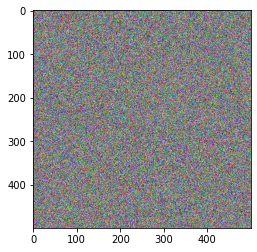

In [242]:
plt.imshow(data_color.reshape(500,500,3));

SOMs len side : x = 31 
sigma = 9.000000 ; learning rate 1.000000 

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.1720177153265356


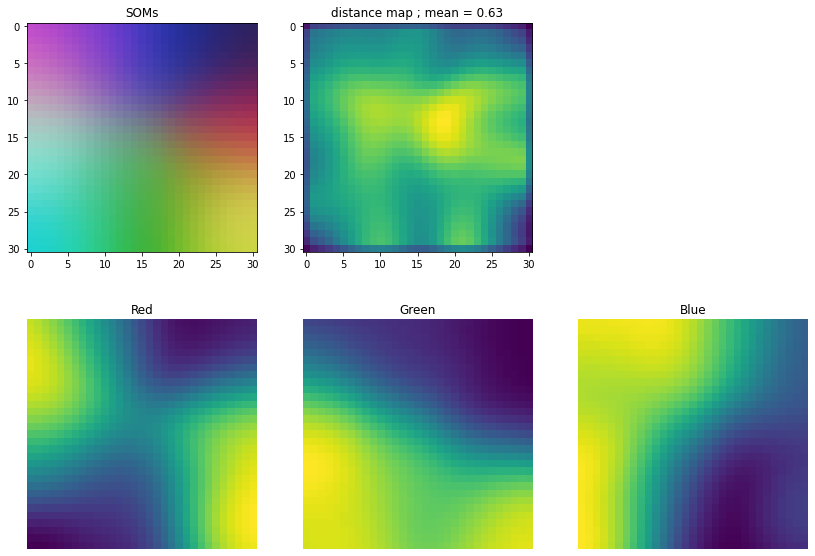

In [213]:
#som_x, som_y = [50,50] # SOMs shape

som_x = int(np.sqrt(5*np.sqrt(nb)))
som_y = som_x

sigma = 9
learning_rate = 1

print("SOMs len side : x = %d " % som_x)
print("sigma = %f ; learning rate %f \n" % (sigma, learning_rate))

som, wts_color = train_som(data_color, 
                           som_x, som_y, 
                           data_color.shape[1], 
                           sigma=sigma, 
                           learning_rate=learning_rate,
                           iterations = 1000,
                           verbose=True)

som_color(data_color, som, wts_color, color_names)

<a name="S3_2"></a>
## Interactive SOMs

In [243]:
interactive_plot(data_color, nb, color_names, False)

interactive(children=(FloatSlider(value=12.0, description='sigma', max=24.0, min=1.0, step=0.5), FloatSlider(v…

<a name="S3_3"></a>
## Test hyperparams auto

In [230]:
# finding the 2 parameters at the same time

space = {'sig' : hp.uniform('sig', 0.001, som_x/2.01),
         'learnR' :hp.uniform('learnR', 0.001, 4)}

def som_fn(space):
    sig = space['sig']
    learnR = space['learnR']

    val = MiniSom(x,y,
                  data_color.shape[1],
                  sig,
                  learnR,
                  ).quantization_error(data_color)

    return {'loss': val, 'status': STATUS_OK}


trials = Trials()
best_params = fmin(
    fn = som_fn,
    space = space,
    algo = tpe.suggest,
    max_evals = 50,
    trials = trials
    )

sigma = best_params['sig']
learning_rate = best_params['learnR']

print("sigma = %f ; learning rate %f \n" % (sigma, learning_rate))

100%|██████████| 50/50 [00:03<00:00, 14.18it/s, best loss: 0.23901981627378624]
sigma = 6.664794 ; learning rate 3.806254 



In [240]:
# finding sigma only

learning_rate = 1

best_sig = fmin(
    fn = lambda sig : MiniSom(som_x,som_y,
                              data_color.shape[1],
                              sig,
                              learning_rate
                              ).quantization_error(data_color),
    space = hp.uniform("sig", 2, x/2.01),
    algo = tpe.suggest,
    max_evals=100)

sigma = best_sig["sig"]


# finding learning rate only

best_learnR = fmin(
    fn = lambda learning_rate : MiniSom(x,y,
                                    input_len,
                                    sigma,
                                    learning_rate
                                    ).quantization_error(data_color),
    space = hp.uniform("learnR", 0.5, 5),
    algo = tpe.suggest,
    max_evals=100)

learning_rate = best_learnR["learnR"]

#~~~~~~~~~~~~~~~
print("sigma = %f ; learning rate %f \n" % (sigma, learning_rate))

100%|██████████| 100/100 [00:06<00:00, 15.15it/s, best loss: 0.23994268436783386]
sigma = 4.727928 ; learning rate 2.678850 



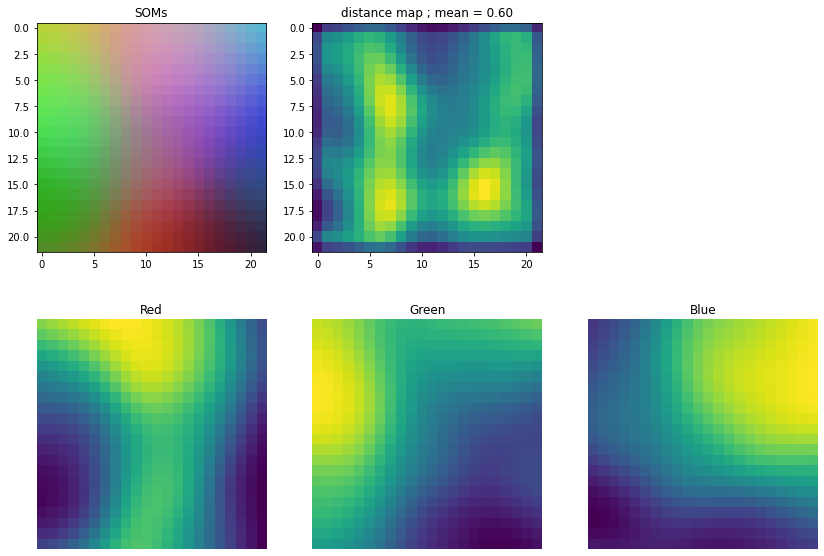

In [74]:
som, wts_color = train_som(x, y, input_len, sigma, learning_rate)

som_color(data_color, wts_color, color_names) # sigma = 5.898, learning_rate = 1.187

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


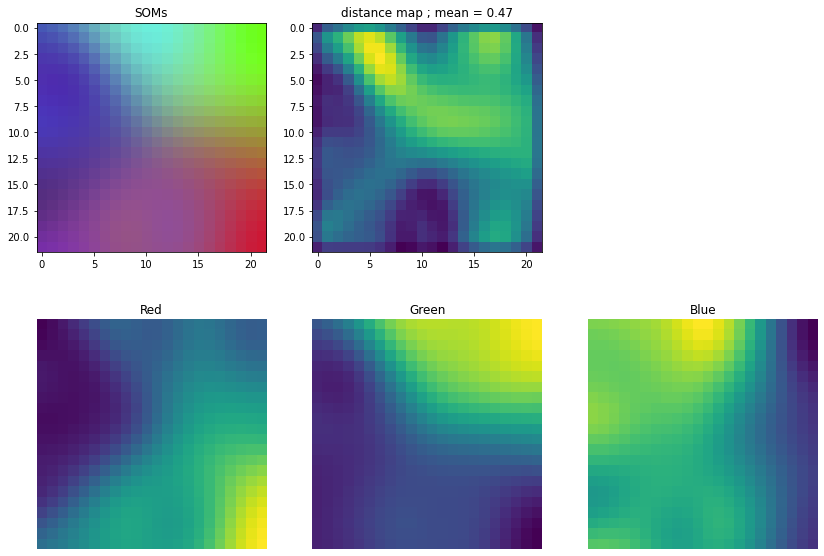

In [62]:
som, wts_color = train_som(x, y, input_len, sigma, learning_rate)

som_color(data_color, wts_color, color_names)# sigma = 9.263, learning_rate = 3.905

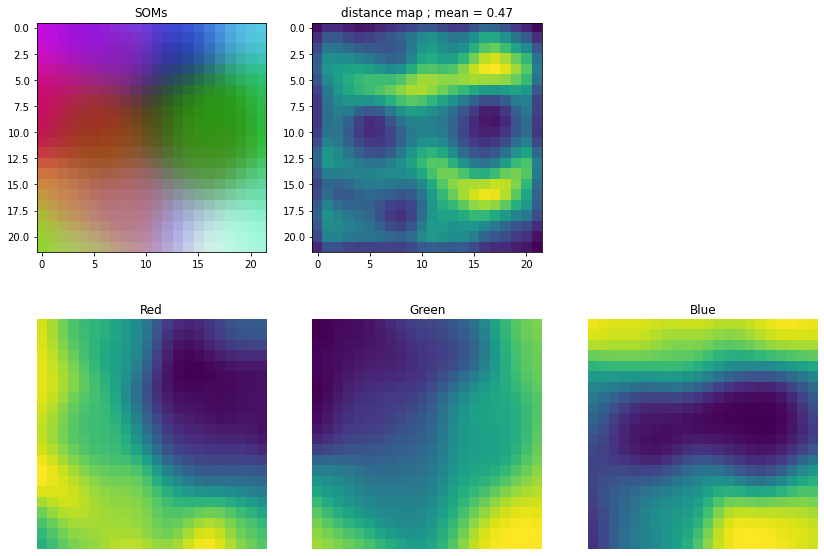

In [67]:
som, wts_color = train_som(x, y, input_len, sigma, learning_rate)

som_color(data_color, wts_color, color_names)# sigma = 4.477, learning_rate = 2.427

<a name="S4"></a>
# COSMOS dataset

## Loading datas

In [0]:
from astropy.io import fits

path_CS_fits = "real_galaxy_catalog_25.2_fits.fits"

with fits.open(path_CS_fits) as hdul:
    hdr = hdul[0].header # header
    data_cs = hdul[1].data # data
    cols = hdul[1].columns # cols 
    Names_cs = cols.names # cols names

In [182]:
nb_cs = data_cs.shape[0] # rows number 

hdul.info()
Names_cs

Filename: real_galaxy_catalog_25.2_fits.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     36   87798R x 14C   [J, D, D, D, 8D, 16D, 5J, D, D, D, J, J, 3D, 4D]   


['IDENT',
 'mag_auto',
 'flux_radius',
 'zphot',
 'sersicfit',
 'bulgefit',
 'fit_status',
 'fit_mad_s',
 'fit_mad_b',
 'fit_dvc_btt',
 'use_bulgefit',
 'viable_sersic',
 'hlr',
 'flux']

### Infos

In [174]:
info_min_max(data_cs, Names_cs)

IDENT 

Max 1443979
Min 20

-------------------------------

mag_auto 

Max 1.0
Min 0.704704159505276

-------------------------------

flux_radius 

Max 56.62507247924805
Min 2.796747922897339

-------------------------------

zphot 

Max 0.9777937985249294
Min 0.0009244878030343573

-------------------------------

sersicfit 

Max 181.12170846645134
Min 0.0
---------
Max 0.9998641236334181
Min 0.0
---------
Max 0.9999999997486005
Min 0.016666666915019362
---------
Max 0.999085212018686
Min 0.05
---------
Max 0.0
Min 0.0
---------
Max 475.1418623367244
Min 0.23707499785345132
---------
Max 474.5236215113057
Min 0.0
---------
Max 3.139033454940841
Min -3.1258451514505134
---------

-------------------------------

bulgefit 

Max 203.13294121938745
Min -1.0
---------
Max 2611267.0105977356
Min -1.0
---------
Max 1.0
Min -1.0
---------
Max 2.24520986068672
Min -1.0
---------
Max 0.0
Min -1.0
---------
Max 475.120981973819
Min -1.0
---------
Max 474.4335253681926
Min -1.0
---------
Max 3.

## Making cuts...

half light radius cut and conversion :

In [183]:
def cut_hight_hlr(cat, lim): # delete hlr problems
    idx = np.where(cat['sersicfit'][:,1]>lim)[0]
    print("nb d'elements suppr", idx.shape)
    cat = np.delete(cat,idx)
    return cat

data_cs['sersicfit'][:,1] *= 0.03 # converting hlr

data_cs = cut_hight_hlr(data_cs, 1) # cut hight hlr values on the full catalog

nb d'elements suppr (5614,)


sersic and others variables normalizations... and cuts

In [0]:
# sersic index
data_cs['sersicfit'][:,2] /= max(data_cs['sersicfit'][:,2])

# magnitude
data_cs['mag_auto'] /= max(data_cs['mag_auto'])

# photometric redshift
data_cs['zphot'] /= max(data_cs['zphot'])

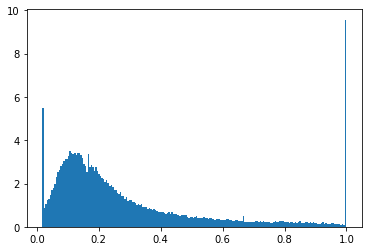

In [185]:
plt.hist(data_cs['sersicfit'][:,2], bins=200, density=True);

In [0]:
data_cs = data_cs[ np.where( data_cs['sersicfit'][:,2] < 1 )[0] ]

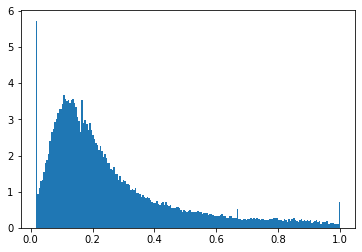

In [187]:
plt.hist(data_cs['sersicfit'][:,2], bins=200, density=True);

In [0]:
data_cs = data_cs[ np.where( data_cs['sersicfit'][:,2] > min(data_cs['sersicfit'][:,2]) )[0] ]

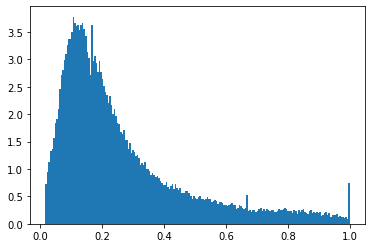

In [189]:
plt.hist(data_cs['sersicfit'][:,2], bins=200, density=True);

q cut :

In [0]:
data_cs = data_cs[ np.where( data_cs['sersicfit'][:,3] < 1 )[0] ]

## Selecting variables

In [191]:
variables = ['magnitude', 
             'half_light_radius', 
             'Sersic',
             'q', 
             'photometric redshift',
             ]

caption = Label(value='Select some variables (at least 2)')
boxs = [Checkbox(description=i) for i in variables]

display(caption, *boxs)

Label(value='Select some variables (at least 2)')

Checkbox(value=False, description='magnitude')

Checkbox(value=False, description='half_light_radius')

Checkbox(value=False, description='Sersic')

Checkbox(value=False, description='q')

Checkbox(value=False, description='photometric redshift')

In [192]:
Datas = [data_cs['mag_auto'],
               data_cs['sersicfit'][:,1],
               data_cs['sersicfit'][:,2],
               data_cs['sersicfit'][:,3],
               data_cs['zphot'],
               ]

dataset_i = []
vars_cs = []
cols = 0
for i in range(len(boxs)):
    if boxs[i].value==1:
        dataset_i.append(Datas[i])
        vars_cs.append(variables[i])
        cols += 1

assert cols>1, "pick at least 2 variables"

choice_cs = np.vstack([*dataset_i]).T

print("Nombre d'éléments :", choice_cs.shape)
print("Selected variables :",vars_cs)

Nombre d'éléments : (76641, 3)
Selected variables : ['half_light_radius', 'Sersic', 'q']


## SOMs training and visualisation

In [83]:
interactive_plot(choice_cs, nb_cs, vars_cs, False)

interactive(children=(FloatSlider(value=9.0, description='sigma', max=18.0, min=1.0, step=0.5), FloatSlider(va…

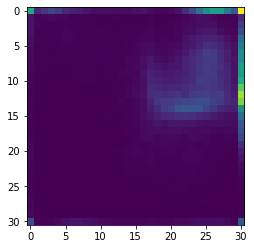

In [244]:
# Training with colors, activation response with COSMOS dataset :


"""
tab=np.zeros((som_x, som_y))

for line in choice_cs:
    tab[som.winner(line)]+=1

plt.imshow(tab);
"""

# does the same thing as above
plt.imshow(som.activation_response(choice_cs));

<a name="S5"></a>
# TU dataset

In [0]:
from astropy.io import fits

path_TU = "TU_created.fits"

with fits.open(path_TU) as hdul:
    hdr = hdul[0].header # header
    data_tu = hdul[1].data # data_tu
    cols = hdul[1].columns # cols
    Names_tu = cols.names # cols names

In [15]:
nb_tu = data_tu.shape[0] # rows number 

hdul.info()
Names_tu

Filename: TU_created.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     20   314709R x 6C   [D, D, D, D, D, D]   


['mag', 'half_light_radius', 'q', 'SSersic_n', 'PA', 'bt']

## Infos

In [179]:
info_min_max(data_tu, Names_tu)

mag 

Max 62.548
Min 15.5034

-------------------------------

half_light_radius 

Max 37.939921001861435
Min 0.001351005439189643

-------------------------------

q 

Max 1.0
Min 0.101

-------------------------------

SSersic_n 

Max 5.762576457449746
Min 0.24720666300706678

-------------------------------

PA 

Max 90.0
Min -90.0

-------------------------------

bt 

Max 1.0
Min 0.0

-------------------------------



## Cuts

In [129]:
data_tu['SSersic_n'] /= max(data_tu['SSersic_n']) # normalisation de sersic pour le som

hlr_sup1 = np.argwhere(data_tu['half_light_radius']>1) # suppression des elements de hlr > 1
print("nombre d'elements suppr :",len(hlr_sup1)) # nombre d'elements supprimes

data_tu = np.delete(data_tu, hlr_sup1)

nombre d'elements suppr : 338


## Selecting variables

In [276]:
variables = Names_tu.copy()

caption = Label(value='Select some variables (at least 2)')
boxs = [Checkbox(description=i) for i in variables]

display(caption, *boxs)

Label(value='Select some variables (at least 2)')

Checkbox(value=False, description='mag')

Checkbox(value=False, description='half_light_radius')

Checkbox(value=False, description='q')

Checkbox(value=False, description='SSersic_n')

Checkbox(value=False, description='PA')

Checkbox(value=False, description='bt')

In [131]:
dataset_i = []
vars_tu = []
cols = 0
for i in range(len(boxs)):
    if boxs[i].value==1:
        dataset_i.append(data_tu[Names_tu[i]])
        vars_tu.append(variables[i])
        cols += 1

assert cols>1, "pick at least 2 variables"

choice_tu = np.vstack([*dataset_i]).T

print("Nombre d'éléments :", choice_tu.shape)
print("Selected variables :",vars_tu)

Nombre d'éléments : (314371, 4)
Selected variables : ['mag', 'half_light_radius', 'q', 'SSersic_n']


## SOMs training and visualisation

In [132]:
interactive_plot(choice_tu, nb_tu, vars_tu, False)

interactive(children=(FloatSlider(value=13.0, description='sigma', max=25.0, min=1.0, step=0.5), FloatSlider(v…